# 📊 Tesla Stock Price Analysis & Future Prediction

This notebook analyzes Tesla Inc. (TSLA) stock performance over the past few months and uses financial metrics and basic machine learning to explore the question:

> **Should I invest in Tesla based on recent price trends?**

We will:
- Visualize Tesla’s historical price data
- Extract key financial insights
- Predict future price trends using a simple regression model
- Offer data-driven insights tailored for investment evaluation


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Improve visuals
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the data
df = pd.read_csv('../data/Tesla-YTD.csv')  # Fixed path to data
df['Date'] = pd.to_datetime(df['Date'])
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

# Display top 10 records
print("Top 10 Trading Days:")
print(df.head(10))

Top 10 Trading Days:
        Date    Open    High     Low   Close       Volume
0 2025-05-02  284.90  294.78  279.81  287.21  114454703.0
1 2025-05-01  280.01  290.87  279.81  280.52   99658969.0
2 2025-04-30  279.90  284.45  270.78  282.16  128961102.0
3 2025-04-29  285.50  293.32  279.47  292.03  108906602.0
4 2025-04-28  288.98  294.86  272.42  285.88  151731812.0
5 2025-04-25  261.69  286.85  259.63  284.95  167560703.0
6 2025-04-24  250.50  259.54  249.20  259.51   94464203.0
7 2025-04-23  254.86  259.45  244.43  250.74  150381906.0
8 2025-04-22  230.96  242.79  229.85  237.97  120858492.0
9 2025-04-21  230.26  232.21  222.79  227.50   97768008.0


In [17]:
## Basic Financial Metrics

In [9]:
# Clean commas and convert necessary columns to numeric
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

# Convert 'Date' to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Check cleaned data
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83 entries, 2025-01-02 to 2025-05-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    83 non-null     float64
 1   High    83 non-null     float64
 2   Low     83 non-null     float64
 3   Close   83 non-null     float64
 4   Volume  83 non-null     float64
dtypes: float64(5)
memory usage: 3.9 KB


## 📈 Tesla Stock Price Over Time

This chart shows how Tesla's closing stock price has changed over the last few months.


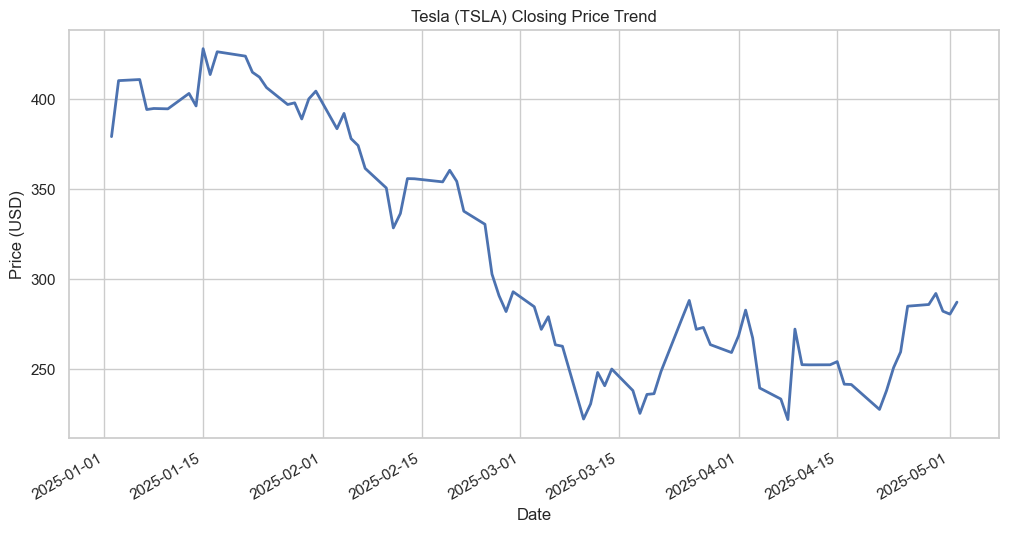

In [10]:
df['Close'].plot(title='Tesla (TSLA) Closing Price Trend', linewidth=2)
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.grid(True)
plt.show()


## 📊 Key Financial Metrics

Here are some important financial indicators based on Tesla’s recent stock performance. These metrics help investors evaluate the stock’s risk, return, and trading activity.


In [11]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Create a metrics summary
metrics = {
    'Average Daily Return (%)': df['Daily Return'].mean() * 100,
    'Volatility (Std Dev %)': df['Daily Return'].std() * 100,
    'Highest Price (USD)': df['High'].max(),
    'Lowest Price (USD)': df['Low'].min(),
    'Average Volume (Shares)': df['Volume'].mean(),
    'Price Range (USD)': df['High'].max() - df['Low'].min(),
    'Average Daily Range (USD)': (df['High'] - df['Low']).mean()
}

# Print results clearly
for key, value in metrics.items():
    if 'Price' in key or 'Range' in key:
        print(f"{key}: ${value:,.2f}")
    elif 'Volume' in key:
        print(f"{key}: {value:,.0f} shares")
    else:
        print(f"{key}: {value:.2f}%")


Average Daily Return (%): -0.21%
Volatility (Std Dev %): 5.22%
Highest Price (USD): $439.74
Lowest Price (USD): $214.25
Average Volume (Shares): 108,273,833 shares
Price Range (USD): $225.49
Average Daily Range (USD): $18.42


## 🔮 Predicting Tesla's Future Prices (Linear Regression)

To estimate future prices, we apply a simple linear regression model based on historical closing prices. While this is not sufficient for real investment, it gives a starting point for trend-based forecasting.

In [12]:
# Create a numeric time index for regression
df['Days Since Start'] = np.arange(len(df))

# Features (X) and Target (y)
X = df[['Days Since Start']]
y = df['Close']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

R² Score: -14.7129
Mean Squared Error: 6075.94


## Final

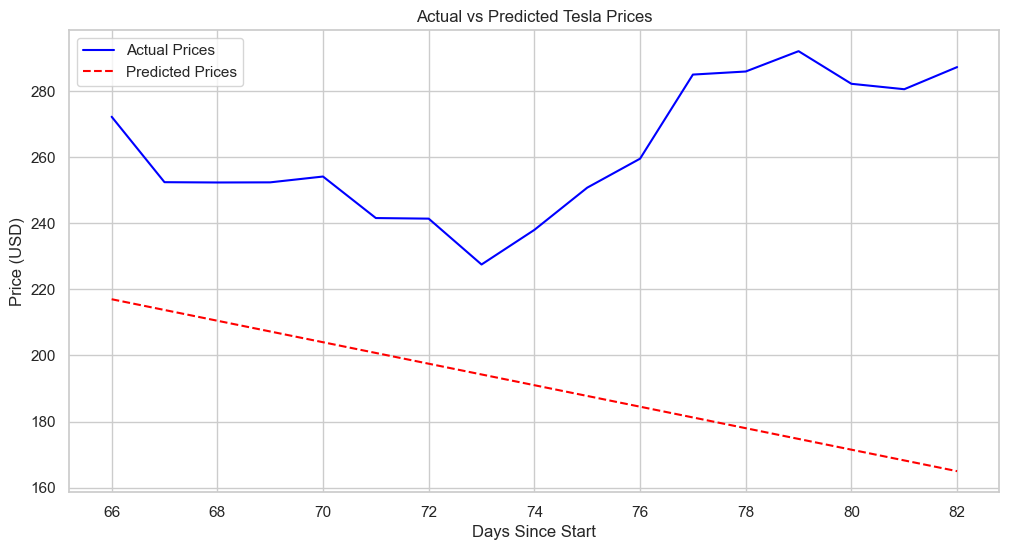

In [13]:
plt.plot(X_test, y_test, label='Actual Prices', color='blue')
plt.plot(X_test, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title("Actual vs Predicted Tesla Prices")
plt.xlabel("Days Since Start")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


### Step 7 – Visualize the Linear Regression Model

To assess how well our model fits the actual stock prices, we plot:
- The **training data**
- The **testing data**
- The **regression line (predictions)**

This visual helps finance analysts evaluate model performance over time and check for underfitting or overfitting.


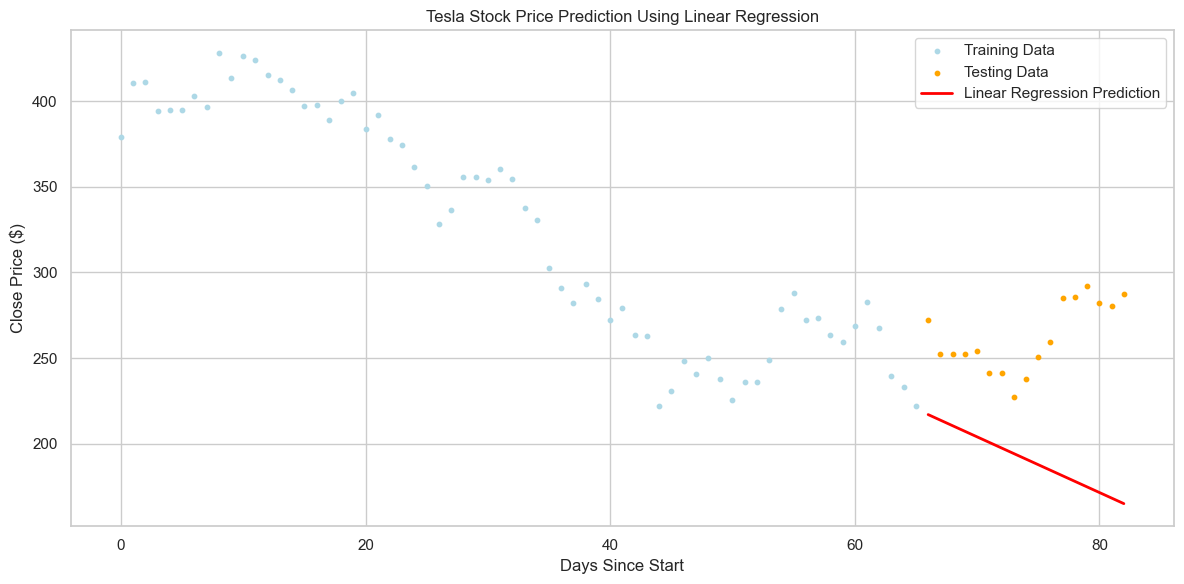

In [14]:
plt.figure(figsize=(12, 6))

# Plot actual closing prices
plt.scatter(X_train, y_train, label='Training Data', color='lightblue', s=10)
plt.scatter(X_test, y_test, label='Testing Data', color='orange', s=10)

# Plot regression line (predicted)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression Prediction')

plt.title("Tesla Stock Price Prediction Using Linear Regression")
plt.xlabel("Days Since Start")
plt.ylabel("Close Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📊 What This Visualization Shows:

    Blue dots = actual prices used to train the model.

    Orange dots = real prices used to test the model.

    Red line = the predicted trend line.

If the red line fits close to the orange dots, your model is predicting reasonably well.

### Step 8 – Predict Future Tesla Stock Prices

Now that our model is trained, we can extend the timeline and forecast Tesla's stock prices for the next 30 days.

This is useful for financial planning, investment decisions, and trend analysis.


In [17]:
# Predict for the next 30 days beyond the dataset
future_days = 30
last_day_index = df['Days Since Start'].iloc[-1]
future_indices = np.arange(last_day_index + 1, last_day_index + 1 + future_days).reshape(-1, 1)
future_df_input = pd.DataFrame(future_indices, columns=['Days Since Start'])

future_predictions = model.predict(future_df_input)

# Create a DataFrame for future predictions
future_df = pd.DataFrame({
    'Days Since Start': future_df_input['Days Since Start'],
    'Predicted Close': future_predictions
})


### Step 8: Visualizing Tesla's Historical and Predicted Stock Prices

This chart shows Tesla’s actual closing prices over the available historical period and the next 30-day forecasted prices using a linear regression model. While this is a simple model that assumes a linear trend, it can help identify general momentum or directional bias in price movement. Caution is advised when using linear models for price forecasting in finance, as real-world market behavior is often nonlinear and influenced by external events.


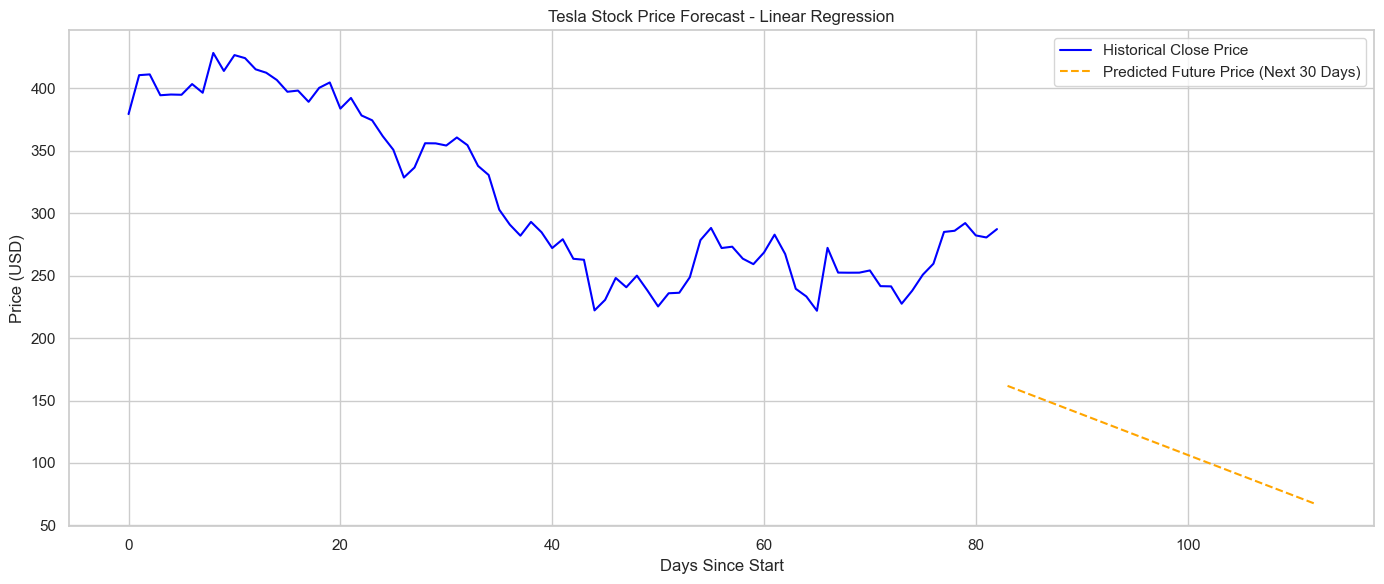

In [18]:
plt.figure(figsize=(14, 6))

# Plot historical close prices
plt.plot(df['Days Since Start'], df['Close'], label='Historical Close Price', color='blue')

# Plot predicted future prices
plt.plot(future_df['Days Since Start'], future_df['Predicted Close'], label='Predicted Future Price (Next 30 Days)', color='orange', linestyle='--')

plt.xlabel('Days Since Start')
plt.ylabel('Price (USD)')
plt.title("Tesla Stock Price Forecast - Linear Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
